### Lab 3 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

In [3]:
df = pd.read_csv('dataset.csv')

In [5]:
df.fillna(value = 0, inplace = True)
for column in df.columns.values:
    df[column] = df[column].astype(int)
    if len(df[column].unique()) == 2:
        df[column] = df[column].astype('category')

In [7]:
scaler = StandardScaler()
X = scaler.fit_transform(df)
sil = []
kmax = 15

for k in range (2, kmax + 1):
  kmeans = KMeans(
        init = "random",
        n_clusters = k,
        n_init = 1,
        max_iter = 200,
        random_state = 123
    ).fit(X)
  etiquetas = kmeans.labels_
  sil.append(silhouette_score(X, etiquetas, metric = 'euclidean'))

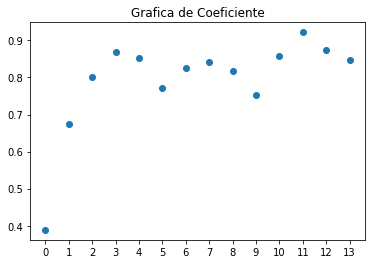

In [10]:
k = list(range(14))
plt.scatter(k, sil)
plt.title('Grafica de Coeficiente')
plt.xticks(k, k)
plt.show()

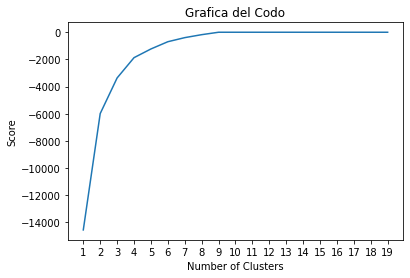

In [12]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Grafica del Codo')
plt.xticks(Nc, Nc)
plt.show()

#### Respuestas
1. 11.
2. Muy similar el método del codo. 
3. Se logró identificar diez familias.